# Project: Fashion Classifier

Zhaoyan Lin   
Dataset: Fashion MNIST 
https://www.kaggle.com/zalando-research/fashionmnist/data


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

Reference: 
Several resources on MNIST visualization.   
http://colah.github.io/posts/2014-10-Visualizing-MNIST/   
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b   

In [3]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
# image size
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
# defined labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/Users/zhaoyanlin/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


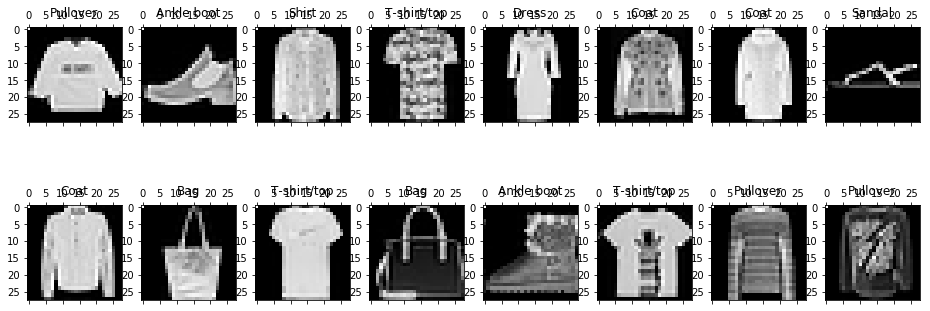

In [5]:
# Plot the graph, get a sense of how the fashion items look like
plt.gray()
fig = plt.figure( figsize=(16,6) )
feat_cols = [ 'pixel'+str(i) for i in range(784) ]
for i in range(0,16):
    ax = fig.add_subplot(2,8,i+1, title=str(labels[train.loc[i,'label']]) )
    ax.matshow(train.loc[i,feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## Using PCA

/Users/zhaoyanlin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


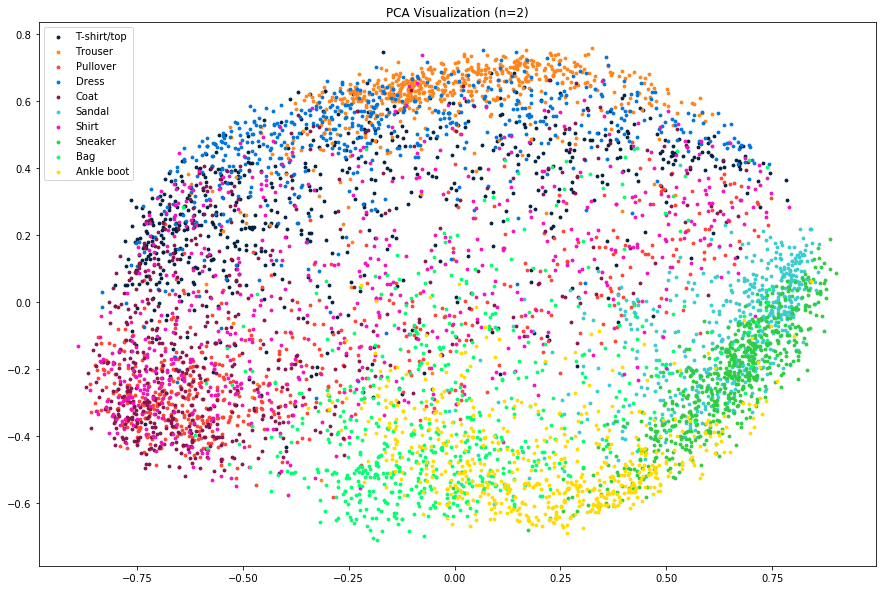

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

# Use 10% of data for visuaization
_, df_copy = train_test_split(train, test_size=0.1)
df_copy_label = df_copy.iloc[:, 0]
df_copy_images = df_copy.iloc[:, 1:]
df_copy_images_ = StandardScaler().fit_transform(df_copy_images)

# push the data to different decision boundaries
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

from ast import literal_eval
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']
plt.rcParams["figure.figsize"] = [15, 10]
for k, i in enumerate(np.unique(df_copy_label)):
    plt.scatter(df_copy_images_component[df_copy_label == i, 0],
               df_copy_images_component[df_copy_label == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k], s=8)
plt.title("PCA Visualization (n=2)")
plt.legend()
plt.show()


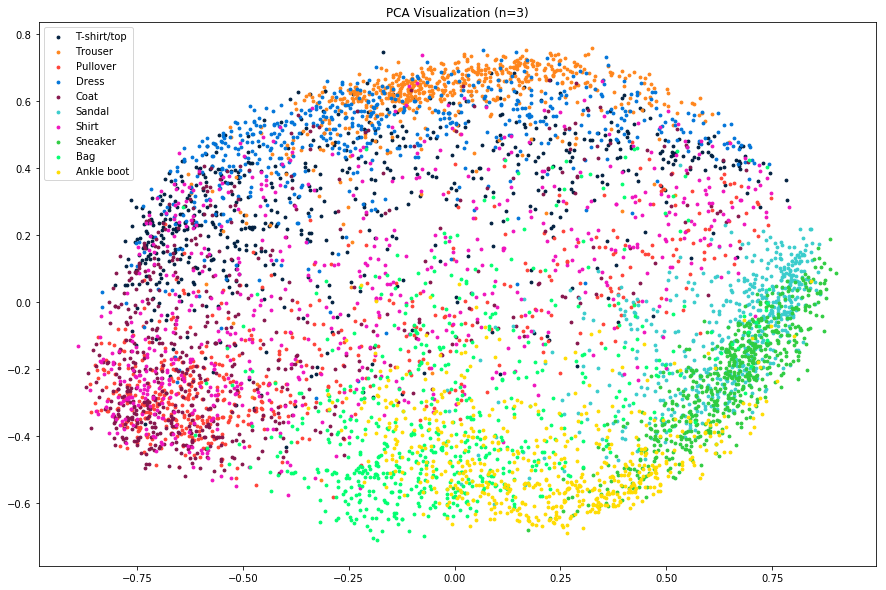

In [7]:
# try n-component=3
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
df_copy_images_component = PCA(n_components = 3).fit_transform(df_copy_images_)

for k, i in enumerate(np.unique(df_copy_label)):
    plt.scatter(df_copy_images_component[df_copy_label == i, 0],
               df_copy_images_component[df_copy_label == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k], s=8)

plt.title("PCA Visualization (n=3)")
plt.legend()
plt.show()

## Using tSNE
Reference:   
http://www.cs.toronto.edu/~hinton/absps/tsne.pdf

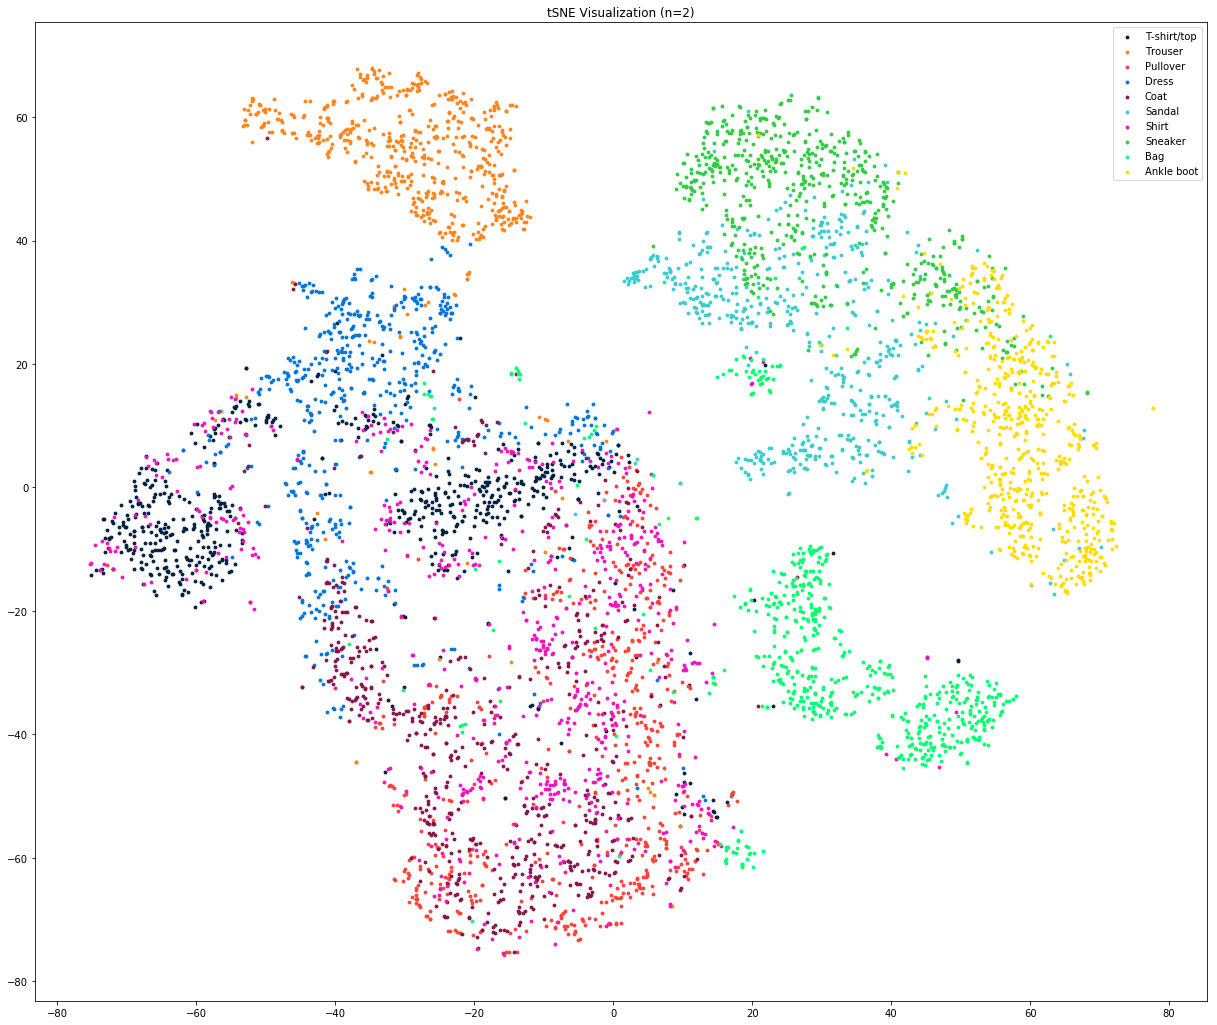

In [8]:
from sklearn.manifold import TSNE
df_copy_images_dist = TSNE(n_components = 2).fit_transform(df_copy_images)

from ast import literal_eval

plt.rcParams["figure.figsize"] = [21, 18]
for k, i in enumerate(np.unique(df_copy_label)):
    plt.scatter(df_copy_images_dist[df_copy_label == i, 0],
               df_copy_images_dist[df_copy_label == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k],s=8)

plt.title("tSNE Visualization (n=2)")
plt.legend()
plt.show()


# Different Models

# Logistic Regression
http://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

Sparsity with L1 penalty: 82.98%
Test score with L1 penalty: 0.7705
Example run in 17.094 s


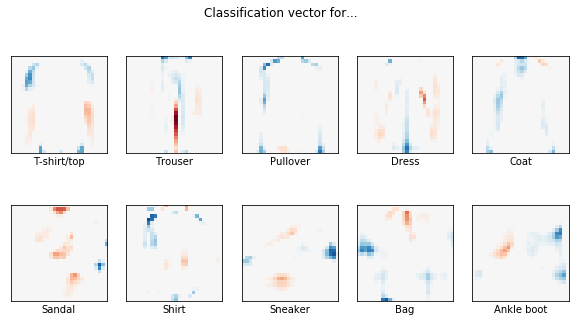

In [7]:
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import time

X = train.iloc[:,1:]
y = train.label

t0 = time.time()
train_samples = 50000

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('%s' % labels[i])
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

# Visualization of MLP weights
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.50716895
Iteration 2, loss = 0.36113215
Iteration 3, loss = 0.33065426
Iteration 4, loss = 0.30720672
Iteration 5, loss = 0.28650146
Iteration 6, loss = 0.26946933
Iteration 7, loss = 0.25572934
Iteration 8, loss = 0.24740280
Iteration 9, loss = 0.23973409
Iteration 10, loss = 0.22418373
Iteration 11, loss = 0.22038472
Iteration 12, loss = 0.20600592
Iteration 13, loss = 0.21767368
Iteration 14, loss = 0.21241009
Iteration 15, loss = 0.19484880
Iteration 16, loss = 0.21099733
Iteration 17, loss = 0.18563021
Iteration 18, loss = 0.17302933
Iteration 19, loss = 0.16678459
Iteration 20, loss = 0.15873101
Iteration 21, loss = 0.15614852
Iteration 22, loss = 0.14837456
Iteration 23, loss = 0.14812846
Iteration 24, loss = 0.15589218
Iteration 25, loss = 0.15180714
Iteration 26, loss = 0.14883269
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0

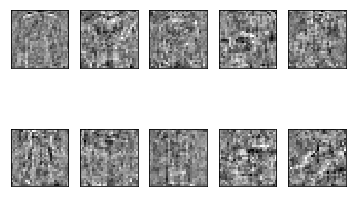

In [98]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

X = train.iloc[:,1:]
y = train.label

t0 = time.time()
train_samples = 50000

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Automatically created module for IPython interactive environment
Iteration 1, loss = 1.06021482
Iteration 2, loss = 0.58472637
Iteration 3, loss = 0.50818766
Iteration 4, loss = 0.46905681
Iteration 5, loss = 0.44449106
Iteration 6, loss = 0.42675178
Iteration 7, loss = 0.41251831
Iteration 8, loss = 0.40114037
Iteration 9, loss = 0.39105491
Iteration 10, loss = 0.38229389
Iteration 11, loss = 0.37436722
Iteration 12, loss = 0.36711057
Iteration 13, loss = 0.36056032
Iteration 14, loss = 0.35470393
Iteration 15, loss = 0.34906758
Iteration 16, loss = 0.34404918
Iteration 17, loss = 0.33881367
Iteration 18, loss = 0.33436696
Iteration 19, loss = 0.32998501
Iteration 20, loss = 0.32600393
Iteration 21, loss = 0.32202215
Iteration 22, loss = 0.31832886
Iteration 23, loss = 0.31465503
Iteration 24, loss = 0.31120808
Iteration 25, loss = 0.30797340
Iteration 26, loss = 0.30462872
Iteration 27, loss = 0.30155559
Iteration 28, loss = 0.29853707
Iteration 29, loss = 0.29560890
Iteration 30, lo

Iteration 251, loss = 0.04334665
Iteration 252, loss = 0.04292907
Iteration 253, loss = 0.04221763
Iteration 254, loss = 0.04204986
Iteration 255, loss = 0.04151511
Iteration 256, loss = 0.04135626
Iteration 257, loss = 0.04061236
Iteration 258, loss = 0.04008462
Iteration 259, loss = 0.03964360
Iteration 260, loss = 0.03977421
Iteration 261, loss = 0.03915619
Iteration 262, loss = 0.03851946
Iteration 263, loss = 0.03809414
Iteration 264, loss = 0.03765039
Iteration 265, loss = 0.03736975
Iteration 266, loss = 0.03756599
Iteration 267, loss = 0.03698011
Iteration 268, loss = 0.03626273
Iteration 269, loss = 0.03611579
Iteration 270, loss = 0.03572067
Iteration 271, loss = 0.03505638
Iteration 272, loss = 0.03475895
Iteration 273, loss = 0.03442347
Iteration 274, loss = 0.03440780
Iteration 275, loss = 0.03394288
Iteration 276, loss = 0.03355056
Iteration 277, loss = 0.03313470
Iteration 278, loss = 0.03261964
Iteration 279, loss = 0.03260719
Iteration 280, loss = 0.03207898
Iteration 

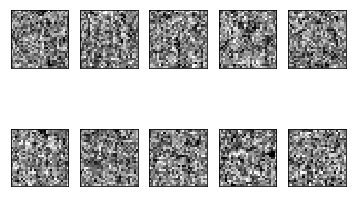

In [97]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

X = train.iloc[:,1:]
y = train.label

t0 = time.time()
train_samples = 50000

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# CNN 
https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
X = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]),10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]),10)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [23]:
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [16]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 75s 2ms/step - loss: 12.7379 - acc: 0.2083 - val_loss: 10.2837 - val_acc: 0.3610
Epoch 2/50
48000/48000 [==============================] - 78s 2ms/step - loss: 10.5555 - acc: 0.3445 - val_loss: 10.2028 - val_acc: 0.3668
Epoch 3/50
48000/48000 [==============================] - 84s 2ms/step - loss: 10.3256 - acc: 0.3590 - val_loss: 10.1294 - val_acc: 0.3714
Epoch 4/50
48000/48000 [==============================] - 75s 2ms/step - loss: 10.2089 - acc: 0.3664 - val_loss: 10.2332 - val_acc: 0.3651
Epoch 5/50
48000/48000 [==============================] - 78s 2ms/step - loss: 9.5353 - acc: 0.4080 - val_loss: 8.9055 - val_acc: 0.4468
Epoch 6/50
48000/48000 [==============================] - 80s 2ms/step - loss: 9.0613 - acc: 0.4373 - val_loss: 8.9153 - val_acc: 0.4465
Epoch 7/50
48000/48000 [==============================] - 82s 2ms/step - loss: 8.9500 - acc: 0.4444 - val_loss: 8.8302 -

In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 7.3940390876770019)
('Test accuracy:', 0.54120000000000001)


In [44]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ['%s' % labels[i] for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

10000/10000 [==============================] - 4s 400us/step
             precision    recall  f1-score   support

T-shirt/top       0.75      0.63      0.69      1000
    Trouser       0.85      0.92      0.89      1000
   Pullover       0.00      0.00      0.00      1000
      Dress       0.57      0.89      0.69      1000
       Coat       0.57      0.58      0.57      1000
     Sandal       0.38      0.98      0.55      1000
      Shirt       0.33      0.44      0.38      1000
    Sneaker       0.39      0.13      0.20      1000
        Bag       0.00      0.00      0.00      1000
 Ankle boot       0.69      0.84      0.76      1000

avg / total       0.45      0.54      0.47     10000



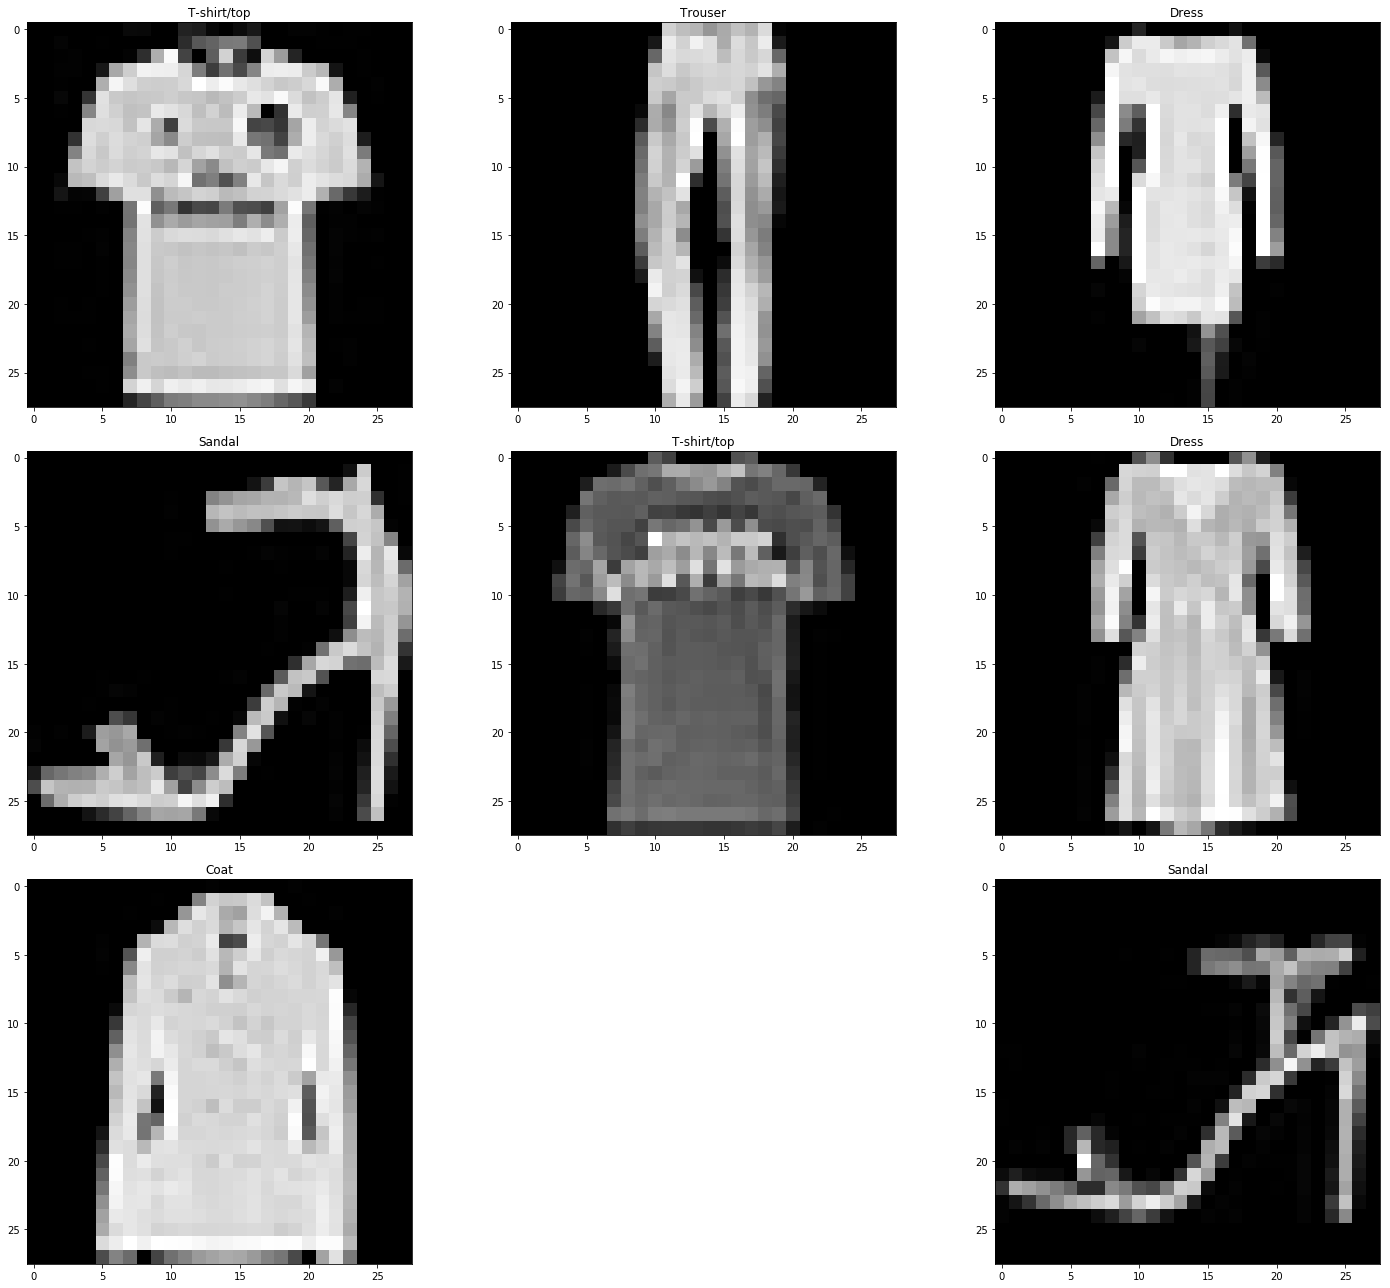

In [45]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("{}".format(labels[predicted_classes[correct]]))
    plt.tight_layout()

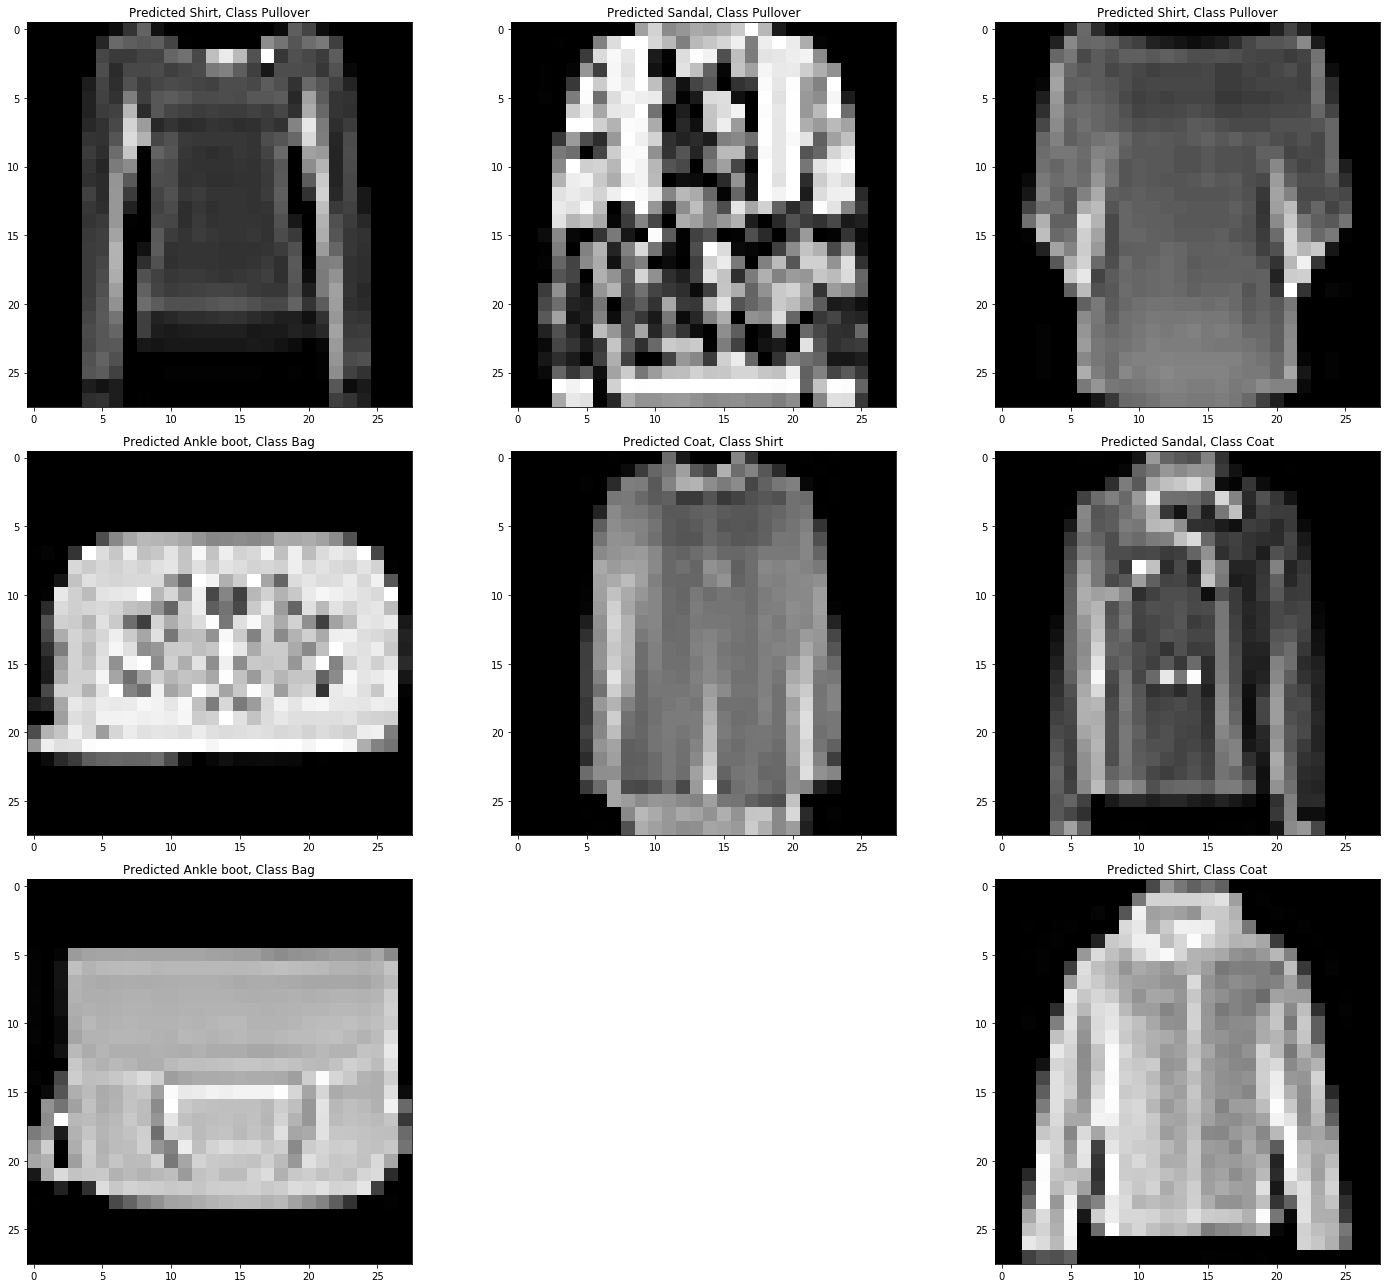

In [46]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    predicted_name=labels[predicted_classes[incorrect]]
    plt.title("Predicted {}, Class {}".format(labels[predicted_classes[incorrect]], labels[y_true[incorrect]]))
    plt.tight_layout()

## CNN after normalization

It seems that the cnn model in keras prefers data below 1. The accuracy improved much after normalization (=/255).

In [63]:
X = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]),10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]),10)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [64]:
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [58]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.8409 - acc: 0.6919 - val_loss: 2.7758 - val_acc: 0.8227
Epoch 2/50
48000/48000 [==============================] - 75s 2ms/step - loss: 0.5129 - acc: 0.8101 - val_loss: 2.5210 - val_acc: 0.8391
Epoch 3/50
48000/48000 [==============================] - 75s 2ms/step - loss: 0.4361 - acc: 0.8404 - val_loss: 2.1990 - val_acc: 0.8594
Epoch 4/50
48000/48000 [==============================] - 75s 2ms/step - loss: 0.3958 - acc: 0.8569 - val_loss: 2.1032 - val_acc: 0.8652
Epoch 5/50
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3620 - acc: 0.8684 - val_loss: 2.0849 - val_acc: 0.8666
Epoch 6/50
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3424 - acc: 0.8758 - val_loss: 2.2506 - val_acc: 0.8569
Epoch 7/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.3226 - acc: 0.8816 - val_loss: 2.1841 - val_acc

In [59]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.19270304438471794)
('Test accuracy:', 0.93020000000000003)


In [60]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ['%s' % labels[i] for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

10000/10000 [==============================] - 4s 434us/step
             precision    recall  f1-score   support

T-shirt/top       0.90      0.85      0.87      1000
    Trouser       0.99      0.99      0.99      1000
   Pullover       0.90      0.90      0.90      1000
      Dress       0.92      0.95      0.93      1000
       Coat       0.89      0.92      0.90      1000
     Sandal       1.00      0.98      0.99      1000
      Shirt       0.80      0.80      0.80      1000
    Sneaker       0.96      0.97      0.96      1000
        Bag       0.99      0.98      0.99      1000
 Ankle boot       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



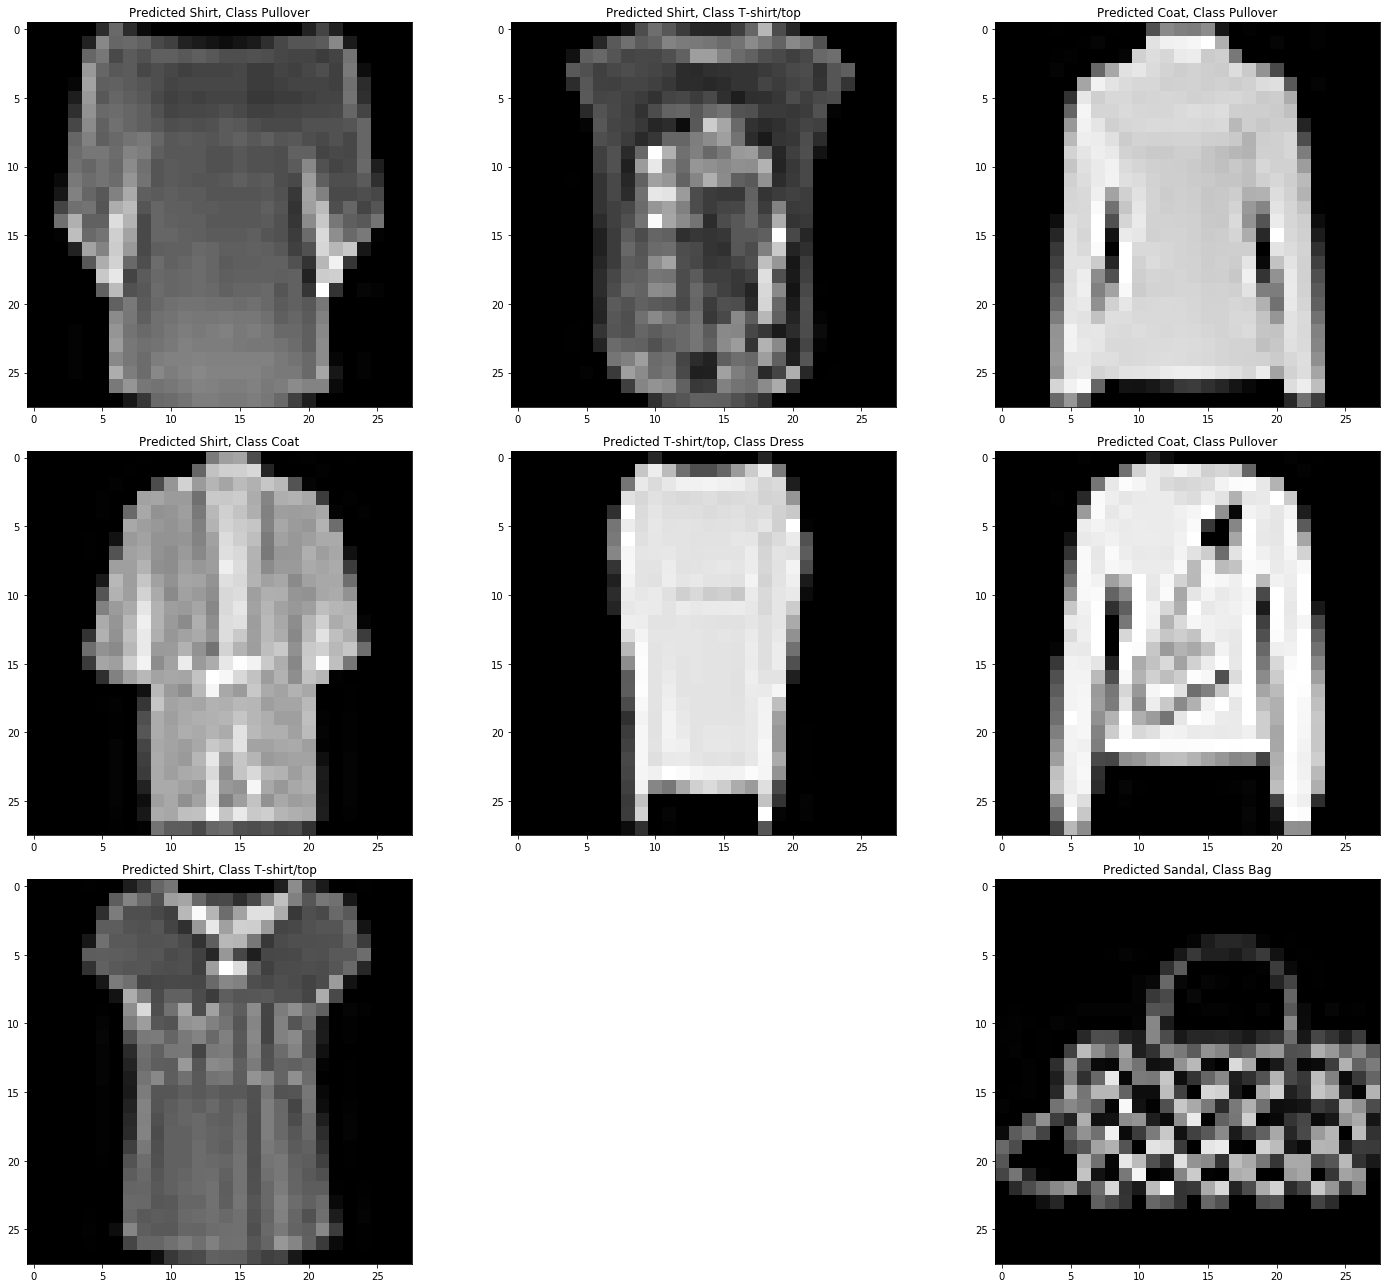

In [61]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    predicted_name=labels[predicted_classes[incorrect]]
    plt.title("Predicted {}, Class {}".format(labels[predicted_classes[incorrect]], labels[y_true[incorrect]]))
    plt.tight_layout()

## CNN Visualization 
http://cs231n.github.io/understanding-cnn/


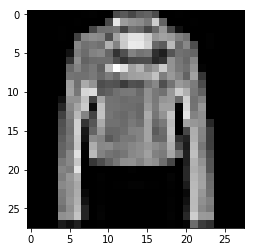

In [68]:
test_im = X_train[13]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

/Users/zhaoyanlin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`
  This is separate from the ipykernel package so we can avoid doing imports until


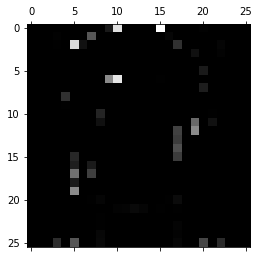

In [75]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

### Visualization of different layers

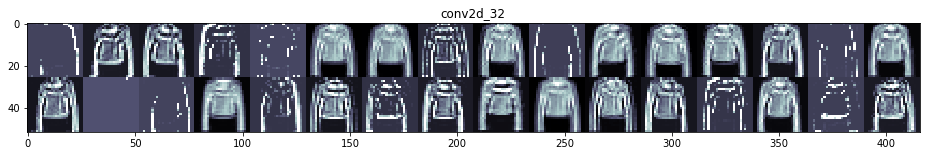

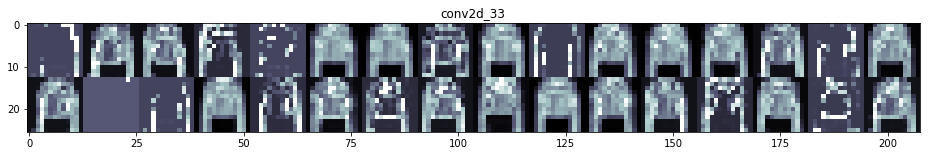

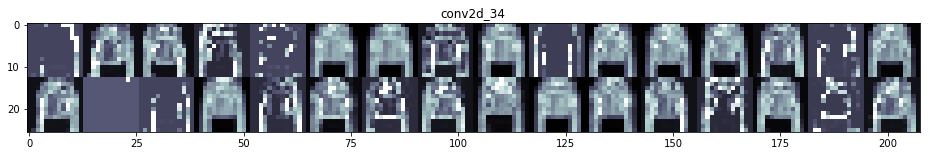

In [84]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')